### Activity 3

- Which columns are numerical?
- Which columns are categorical?
- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
customer_df = pd.read_csv('data/Data_Marketing_Customer_Analysis_Round2.csv')

In [90]:
customer_df.info()
## float: customer lifetime value, months since last claim, number of open claims, total claim amount
## int: unnamed, income, monthly premium, months since policy inception, number ofmpolicies
## object: customer, state, response, coverage, education, effective to date, employment status, gender, ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [91]:
customer_df['Effective To Date'].unique()

array(['2/18/11', '1/18/11', '2/10/11', '1/11/11', '1/17/11', '2/14/11',
       '2/24/11', '1/19/11', '1/4/11', '1/2/11', '2/7/11', '1/31/11',
       '1/26/11', '2/28/11', '1/16/11', '2/26/11', '2/23/11', '1/15/11',
       '2/2/11', '2/15/11', '1/24/11', '2/21/11', '2/22/11', '1/7/11',
       '1/28/11', '2/8/11', '2/12/11', '2/20/11', '1/5/11', '2/19/11',
       '1/3/11', '2/3/11', '1/22/11', '1/23/11', '2/5/11', '2/13/11',
       '1/25/11', '2/16/11', '2/1/11', '1/27/11', '1/12/11', '1/20/11',
       '2/6/11', '2/11/11', '1/21/11', '1/29/11', '1/9/11', '2/9/11',
       '2/27/11', '1/1/11', '2/17/11', '2/25/11', '1/13/11', '1/6/11',
       '2/4/11', '1/14/11', '1/10/11', '1/8/11', '1/30/11'], dtype=object)

In [92]:
customer_df['Month'] = customer_df['Effective To Date'].str.get(0) ## gets index 0 of each string and appends to new column

In [93]:
## if month column is 1,2,3 then print 


first_quarter = ['1', '2', '3'] ## creates an array with options for first quarter months
customer_df = customer_df.loc[customer_df['Month'].isin(first_quarter)] ## filters by first quarter

## data set is already unique to first quarter


In [94]:
customer_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


### Activity 4

- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [95]:
categorical = customer_df.loc[:,customer_df.dtypes==np.object]
numerical = customer_df.loc[:,customer_df.dtypes==np.number]

/var/folders/g0/t2l0bdnj06l1ns109451lxvw0000gp/T/ipykernel_68355/4215191322.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = customer_df.loc[:,customer_df.dtypes==np.object]


In [96]:
numerical

,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


In [97]:
## plt.figure(figsize=(12,12))
##for i, column in enumerate(numerical.columns,1):
##    plt.subplot(2,2,i)
##    sns.histplot(numerical[column])
##list(enumerate(numerical.columns,1))

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

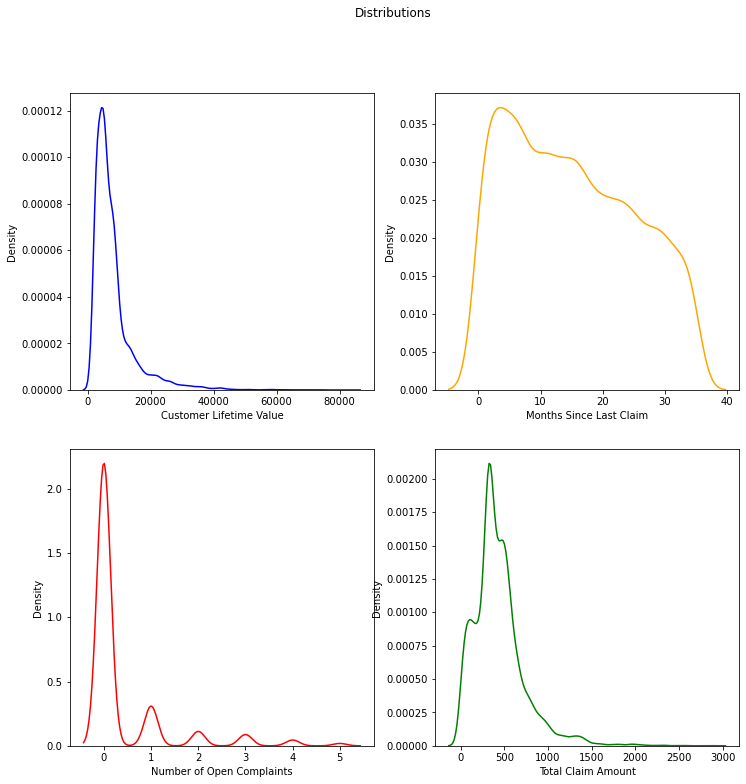

In [98]:
fig1, ax = plt.subplots(2,2, figsize = (12, 12))
plt.suptitle("Distributions")


sns.kdeplot(numerical['Customer Lifetime Value'], color= 'blue', ax=ax[0,0])

sns.kdeplot(numerical['Months Since Last Claim'], color= 'orange', ax=ax[0,1])

sns.kdeplot(numerical['Number of Open Complaints'],color= 'red', ax=ax[1,0])

sns.kdeplot(numerical['Total Claim Amount'],  color= 'green', ax=ax[1,1])

Text(0.5, 0, 'Customer Lifetime Value')

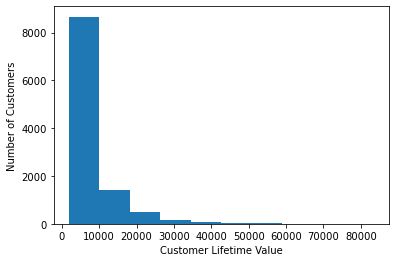

In [104]:
plt.hist(numerical['Customer Lifetime Value'], bins= 10)
plt.ylabel('Number of Customers')
plt.xlabel('Customer Lifetime Value')

Text(0.5, 0, 'Months since last claim')

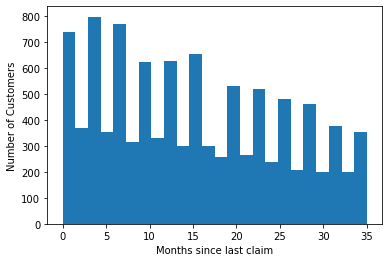

In [105]:
plt.hist(numerical['Months Since Last Claim'], bins = 24)
plt.ylabel('Number of Customers')
plt.xlabel('Months since last claim')

Text(0.5, 0, 'Number of Open Complaints')

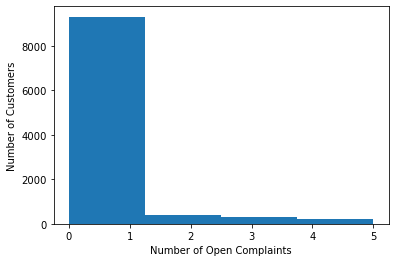

In [106]:
plt.hist(numerical['Number of Open Complaints'], bins = 4)
plt.ylabel('Number of Customers')
plt.xlabel('Number of Open Complaints')

Text(0.5, 0, 'Number of Open Complaints')

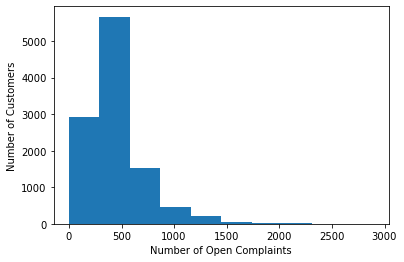

In [107]:
plt.hist(numerical['Total Claim Amount'], bins = 10)
plt.ylabel('Number of Customers')
plt.xlabel('Total Claim Amount')

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

<AxesSubplot:>

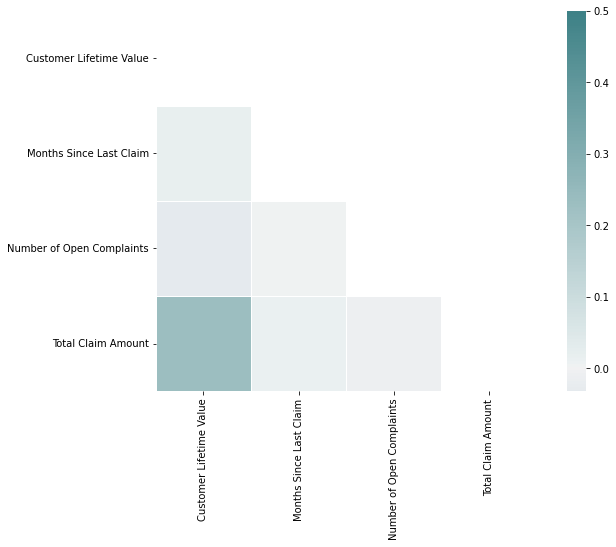

In [129]:
corr = numerical.corr() ## generate matrix

mask = np.triu(np.ones_like(corr, dtype=bool))

fig6, ax = plt.subplots(figsize=(11,7))

cmap = sns.diverging_palette(600, 42320, as_cmap = True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .5, center=0, square=True, linewidths=.5)